In [931]:
import torch
from torch import nn
from torch.nn import functional as F
from torch import optim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [2]:
device = torch.device("cpu")

In [83]:
gameStateDF = pd.read_csv('gameStateDF.csv')

In [84]:
gameStateDF

,timer,has_round_started,is_round_over,player_id_1,health_1,x_coord_1,y_coord_1,is_jumping_1,is_crouching_1,up_1,...,start_2,Y_2,B_2,X_2,A_2,L_2,R_2,is_player_in_move_2,move_id_2,x_distance
0,153,0,0,7,176,205,192,0,0,0,...,0,0,0,0,0,0,0,0,0,102
1,153,0,0,7,176,205,192,0,0,0,...,0,0,0,0,0,0,0,0,0,102
2,153,0,0,7,176,205,192,0,0,1,...,0,0,0,0,0,0,0,0,0,102
3,153,0,0,7,176,205,192,0,0,0,...,0,0,0,0,0,0,0,0,0,102
4,153,0,0,7,176,205,192,0,0,0,...,0,0,0,0,0,0,0,0,0,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17119,98,1,0,0,126,144,192,0,0,0,...,0,0,0,0,0,0,1,0,0,47
17120,98,1,0,0,126,145,192,0,1,0,...,0,0,0,0,0,0,0,0,0,49
17121,98,1,0,0,126,145,192,0,1,0,...,0,0,0,0,0,0,0,0,0,50
17122,98,1,0,0,126,145,192,0,1,0,...,0,0,0,0,0,0,1,0,0,50


In [209]:
gameStateDF2 = pd.read_csv('gameStateDF2.csv')

In [210]:
gameStateDF2

,timer,has_round_started,is_round_over,player_id_1,health_1,x_coord_1,y_coord_1,is_jumping_1,is_crouching_1,up_1,...,B_2,X_2,A_2,L_2,R_2,is_player_in_move_2,move_id_2,x_distance,is_moving_towards_opp,is_moving_away_opp
0,153,0,0,0,176,205,192,0,0,0,...,0,0,0,0,0,0,0,102,0,0
1,153,0,0,0,176,205,192,0,0,0,...,0,0,0,0,0,0,0,102,1,0
2,153,0,0,0,176,205,192,0,0,0,...,0,0,0,0,0,0,0,102,1,0
3,153,0,0,0,176,205,192,0,0,0,...,0,0,0,0,0,0,0,102,0,0
4,153,0,0,0,176,205,192,0,0,0,...,0,0,0,0,0,0,0,102,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,104,1,0,0,120,276,192,0,0,0,...,0,0,0,0,0,0,0,-87,1,0
1052,104,1,0,0,120,276,192,0,0,0,...,0,0,0,0,0,0,0,-87,0,0
1053,104,1,0,0,120,276,192,0,0,0,...,0,0,0,0,0,0,0,-87,0,0
1054,104,1,0,0,120,276,192,0,0,0,...,0,0,0,0,0,0,0,-87,1,0


In [948]:
gameStateDF3 = pd.read_csv('gameStateDF3.csv')

In [1130]:
gameStateDF3

,timer,has_round_started,is_round_over,player_id_1,health_1,x_coord_1,y_coord_1,is_jumping_1,is_crouching_1,up_1,...,next_down,next_right,next_left,next_Y,next_B,next_X,next_A,next_L,next_R,y_distance
0,153,0,0,0,176,205,192,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,153,0,0,0,176,205,192,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,153,0,0,0,176,205,192,0,0,0,...,1,1,0,0,0,0,0,0,0,0
3,153,0,0,0,176,205,192,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,153,0,0,0,176,205,192,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12337,56,1,0,0,0,144,192,0,0,0,...,0,0,1,0,0,0,0,0,0,0
12338,56,1,0,0,0,144,192,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12339,56,1,0,0,0,115,192,0,0,0,...,0,0,0,0,0,0,0,0,0,-13
12340,56,1,0,0,0,115,192,0,0,0,...,0,0,1,0,0,0,0,0,0,-16


In [1129]:
gameStateDF3["y_distance"] = gameStateDF3["y_coord_2"] - gameStateDF3["y_coord_1"]

In [1154]:
print(gameStateDF3["x_distance"].min())

-208


In [ ]:
gsdf3Copy["health_1"] = (gsdf3Copy["health_1"] - gsdf3Copy["health_1"].min()) / (gsdf3Copy["health_1"].max() - gsdf3Copy["health_1"].min())
gsdf3Copy["health_2"] = (gsdf3Copy["health_2"] - gsdf3Copy["health_2"].min()) / (gsdf3Copy["health_2"].max() - gsdf3Copy["health_2"].min())
gsdf3Copy["timer"] = (gsdf3Copy["timer"] - gsdf3Copy["timer"].min()) / (gsdf3Copy["timer"].max() - gsdf3Copy["timer"].min())
gsdf3Copy["x_coord_1"] = (gsdf3Copy["x_coord_1"] - gsdf3Copy["x_coord_1"].min()) / (gsdf3Copy["x_coord_1"].max() - gsdf3Copy["x_coord_1"].min())
gsdf3Copy["y_coord_1"] = (gsdf3Copy["y_coord_1"] - gsdf3Copy["y_coord_1"].min()) / (gsdf3Copy["y_coord_1"].max() - gsdf3Copy["y_coord_1"].min())
gsdf3Copy["x_coord_2"] = (gsdf3Copy["x_coord_2"] - gsdf3Copy["x_coord_2"].min()) / (gsdf3Copy["x_coord_2"].max() - gsdf3Copy["x_coord_2"].min())
gsdf3Copy["y_coord_2"] = (gsdf3Copy["y_coord_2"] - gsdf3Copy["y_coord_2"].min()) / (gsdf3Copy["y_coord_2"].max() - gsdf3Copy["y_coord_2"].min())
gsdf3Copy["x_distance"] = (gsdf3Copy["x_distance"] - gsdf3Copy["x_distance"].min()) / (gsdf3Copy["x_distance"].max() - gsdf3Copy["x_distance"].min())
gsdf3Copy["y_distance"] = (gsdf3Copy["y_distance"] - gsdf3Copy["y_distance"].min()) / (gsdf3Copy["y_distance"].max() - gsdf3Copy["y_distance"].min())

In [1116]:
gsdf3 = gameStateDF3[

    (gameStateDF3["next_up"] == 1) |
    (gameStateDF3["next_down"] == 1) |
    (gameStateDF3["next_left"] == 1) |
    (gameStateDF3["next_right"] == 1) |
    (gameStateDF3["next_Y"] == 1) |
    (gameStateDF3["next_B"] == 1) |
    (gameStateDF3["next_X"] == 1) |
    (gameStateDF3["next_A"] == 1) |
    (gameStateDF3["next_L"] == 1) |
    (gameStateDF3["next_R"] == 1)
]

gsdf3

,timer,has_round_started,is_round_over,player_id_1,health_1,x_coord_1,y_coord_1,is_jumping_1,is_crouching_1,up_1,...,next_up,next_down,next_right,next_left,next_Y,next_B,next_X,next_A,next_L,next_R
1,153,0,0,0,176,205,192,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,153,0,0,0,176,205,192,0,0,0,...,0,1,1,0,0,0,0,0,0,0
4,153,0,0,0,176,205,192,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,153,0,0,0,176,205,192,0,0,0,...,0,1,0,1,0,0,0,0,0,0
7,153,0,0,0,176,205,192,0,0,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12328,56,1,0,0,0,115,165,1,0,0,...,0,0,0,1,0,0,0,0,0,0
12331,56,1,0,0,0,115,172,1,0,0,...,0,1,0,0,0,0,0,0,0,1
12334,56,1,0,0,0,141,181,1,0,0,...,0,0,0,1,0,0,0,0,0,0
12337,56,1,0,0,0,144,192,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [1117]:
gsdf3Copy = gsdf3.copy()

In [1120]:
gsdf3Copy["health_1"] = (gsdf3Copy["health_1"] - gsdf3Copy["health_1"].min()) / (gsdf3Copy["health_1"].max() - gsdf3Copy["health_1"].min())
gsdf3Copy["health_2"] = (gsdf3Copy["health_2"] - gsdf3Copy["health_2"].min()) / (gsdf3Copy["health_2"].max() - gsdf3Copy["health_2"].min())
gsdf3Copy["timer"] = (gsdf3Copy["timer"] - gsdf3Copy["timer"].min()) / (gsdf3Copy["timer"].max() - gsdf3Copy["timer"].min())
gsdf3Copy["x_coord_1"] = (gsdf3Copy["x_coord_1"] - gsdf3Copy["x_coord_1"].min()) / (gsdf3Copy["x_coord_1"].max() - gsdf3Copy["x_coord_1"].min())
gsdf3Copy["y_coord_1"] = (gsdf3Copy["y_coord_1"] - gsdf3Copy["y_coord_1"].min()) / (gsdf3Copy["y_coord_1"].max() - gsdf3Copy["y_coord_1"].min())
gsdf3Copy["x_coord_2"] = (gsdf3Copy["x_coord_2"] - gsdf3Copy["x_coord_2"].min()) / (gsdf3Copy["x_coord_2"].max() - gsdf3Copy["x_coord_2"].min())
gsdf3Copy["y_coord_2"] = (gsdf3Copy["y_coord_2"] - gsdf3Copy["y_coord_2"].min()) / (gsdf3Copy["y_coord_2"].max() - gsdf3Copy["y_coord_2"].min())
gsdf3Copy["x_distance"] = (gsdf3Copy["x_distance"] - gsdf3Copy["x_distance"].min()) / (gsdf3Copy["x_distance"].max() - gsdf3Copy["x_distance"].min())
gsdf3Copy["y_distance"] = (gsdf3Copy["y_distance"] - gsdf3Copy["y_distance"].min()) / (gsdf3Copy["y_distance"].max() - gsdf3Copy["y_distance"].min())

In [1121]:
gsdf3Copy

,timer,has_round_started,is_round_over,player_id_1,health_1,x_coord_1,y_coord_1,is_jumping_1,is_crouching_1,up_1,...,next_down,next_right,next_left,next_Y,next_B,next_X,next_A,next_L,next_R,y_distance
1,1.000000,0,0,0,1.0,0.357143,1.000000,0,0,0,...,0,1,0,0,0,0,0,0,0,0.526316
2,1.000000,0,0,0,1.0,0.357143,1.000000,0,0,0,...,1,1,0,0,0,0,0,0,0,0.526316
4,1.000000,0,0,0,1.0,0.357143,1.000000,0,0,0,...,1,0,0,0,0,0,0,0,0,0.526316
5,1.000000,0,0,0,1.0,0.357143,1.000000,0,0,0,...,1,0,1,0,0,0,0,0,0,0.526316
7,1.000000,0,0,0,1.0,0.357143,1.000000,0,0,0,...,0,0,1,1,0,0,0,0,0,0.526316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12328,0.276119,1,0,0,0.0,0.142857,0.785714,1,0,0,...,0,0,1,0,0,0,0,0,0,0.627820
12331,0.276119,1,0,0,0.0,0.142857,0.841270,1,0,0,...,1,0,0,0,0,0,0,0,1,0.601504
12334,0.276119,1,0,0,0.0,0.204762,0.912698,1,0,0,...,0,0,1,0,0,0,0,0,0,0.567669
12337,0.276119,1,0,0,0.0,0.211905,1.000000,0,0,0,...,0,0,1,0,0,0,0,0,0,0.526316


In [1118]:
gsdf3Copy["y_distance"] = gsdf3Copy["y_coord_2"] - gsdf3Copy["y_coord_1"]

In [710]:
gsdf3Copy[gsdf3Copy["next_B"] == 1]

,timer,has_round_started,is_round_over,player_id_1,health_1,x_coord_1,y_coord_1,is_jumping_1,is_crouching_1,up_1,...,next_up,next_down,next_right,next_left,next_Y,next_B,next_X,next_A,next_L,next_R
19,1.000000,0,0,0,1.000000,0.357143,1.000000,0,0,0,...,1,0,1,0,0,1,0,0,0,0
49,1.000000,0,0,0,1.000000,0.357143,1.000000,0,0,0,...,1,0,1,0,0,1,0,0,0,0
70,1.000000,0,0,0,1.000000,0.357143,1.000000,0,0,0,...,1,0,1,0,0,1,0,0,0,0
73,1.000000,0,0,0,1.000000,0.357143,1.000000,0,0,0,...,1,0,1,0,0,1,0,0,0,0
76,1.000000,0,0,0,1.000000,0.357143,1.000000,0,0,0,...,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12214,0.350746,1,0,0,0.107955,0.321429,1.000000,0,0,0,...,1,0,1,0,0,1,0,0,0,0
12226,0.343284,1,0,0,0.107955,0.121429,1.000000,0,0,0,...,1,0,1,0,0,1,0,0,0,0
12259,0.335821,1,0,0,0.000000,0.561905,0.841270,1,0,0,...,1,0,0,1,0,1,0,0,0,0
12274,0.335821,1,0,0,0.000000,0.226190,0.507937,0,0,0,...,1,0,0,1,0,1,0,0,0,0


In [1122]:
# Split the data into train and test
train = gsdf3Copy.sample(frac=0.8, random_state=200)
test = gsdf3Copy.drop(train.index)

# Convert the data into tensors
train_x = torch.from_numpy(train[
    [
        "timer",
        "x_coord_1",
        "y_coord_1",
        "x_coord_2",
        "y_coord_2",
        "is_jumping_1",
        "is_crouching_1",
        "up_1",
        "down_1",
        "right_1",
        "left_1",
        "Y_1",
        "B_1",
        "X_1",
        "A_1",
        "L_1",
        "R_1",
        "is_player_in_move_1",
        "is_jumping_2",
        "is_crouching_2",
        "is_player_in_move_2",
        "is_moving_towards_opp",
        "is_moving_away_opp",
        "x_distance",
        "y_distance"
        # "health_1",
        # "health_2"
    ]].values).float()

train_y = torch.from_numpy(train[["next_Y"]].values).float()

test_x = torch.from_numpy(test[
    [
        "timer",
        "x_coord_1",
        "y_coord_1",
        "x_coord_2",
        "y_coord_2",
        "is_jumping_1",
        "is_crouching_1",
        "up_1",
        "down_1",
        "right_1",
        "left_1",
        "Y_1",
        "B_1",
        "X_1",
        "A_1",
        "L_1",
        "R_1",
        "is_player_in_move_1",
        "is_jumping_2",
        "is_crouching_2",
        "is_player_in_move_2",
        "is_moving_towards_opp",
        "is_moving_away_opp",
        "x_distance",
        "y_distance"
        # "health_1",
        # "health_2"
    ]].values).float()

test_y = torch.from_numpy(test[["next_Y"]].values).float()

In [1123]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

torch.Size([4830, 25])
torch.Size([4830, 1])
torch.Size([1208, 25])
torch.Size([1208, 1])


In [1124]:
class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()

        self.layer1 = nn.Linear(25, 30)
        self.a1 = nn.LeakyReLU()
        self.layer2 = nn.Linear(30, 30)
        self.a2 = nn.Sigmoid()
        self.layer3 = nn.Linear(30, 1)

    def forward(self, x):

        x = self.layer1(x)
        x = self.a1(x)
        x = self.layer2(x)
        x = self.a2(x)
        x = self.layer3(x)
        x = torch.sigmoid(x)
    
        return x

In [1125]:
class WeightedLoss(nn.Module):
    def __init__(self, weight):
        super(WeightedLoss, self).__init__()
        self.weight = weight
    
    def forward(self, pred, target):
        loss = nn.BCELoss()(pred, target)
        weighted_loss = self.weight * loss
        return weighted_loss

Epoch: 0, Loss: 0.6555935144424438
Epoch: 100, Loss: 0.4389148950576782
Epoch: 200, Loss: 0.43436408042907715
Epoch: 300, Loss: 0.4154376685619354
Epoch: 400, Loss: 0.34130603075027466
Epoch: 500, Loss: 0.2978389859199524
Epoch: 600, Loss: 0.2917793393135071
Epoch: 700, Loss: 0.288274347782135
Epoch: 800, Loss: 0.2851697504520416
Epoch: 900, Loss: 0.2843770384788513
Epoch: 1000, Loss: 0.2839711904525757
Epoch: 1100, Loss: 0.2827014625072479
Epoch: 1200, Loss: 0.2813088595867157
Epoch: 1300, Loss: 0.2793990969657898
Epoch: 1400, Loss: 0.2791338562965393
Epoch: 1500, Loss: 0.278899222612381
Epoch: 1600, Loss: 0.2778221666812897
Epoch: 1700, Loss: 0.2774720788002014
Epoch: 1800, Loss: 0.27647802233695984
Epoch: 1900, Loss: 0.2761974632740021
Epoch: 2000, Loss: 0.2760345935821533
Epoch: 2100, Loss: 0.27556920051574707
Epoch: 2200, Loss: 0.2755836844444275
Epoch: 2300, Loss: 0.2748783528804779
Epoch: 2400, Loss: 0.27469122409820557
Epoch: 2500, Loss: 0.274832159280777
Epoch: 2600, Loss: 0.2

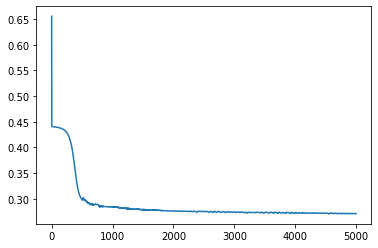

In [1126]:
newt = Model1().to(device)
# criterion = WeightedLoss(weight = 10)
criterion = nn.BCELoss()
optimizer = optim.SGD(newt.parameters(), lr=0.5)

losses = []
for epoch in range(5000):
    optimizer.zero_grad()
    out = newt(train_x)
    # train_y_one_hot = train_y_one_hot.float()
    # loss = criterion(out, train_y_one_hot)
    loss = criterion(out, train_y)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print('Epoch: {}, Loss: {}'.format(epoch, loss.item()))

plt.plot(losses)
plt.show()

In [1127]:
with torch.no_grad():
    preds = newt(test_x)
    predictions = preds.round()

# print("Predicted:")
# print(predictions)

# print("Actual:")
# print(test_y)

correct1s = 0
total1s = 0
false1s = 0

for i in range(len(predictions)):
  if (test_y[i] == 1):
     total1s += 1
     if (predictions[i] == 1.0):
        correct1s += 1
  elif(predictions[i] == 1.0):
     false1s += 1


print(f"Predicetd {correct1s} 1's out of {total1s} with {false1s} false positive 1's")

Predicetd 37 1's out of 185 with 34 false positive 1's


In [1128]:
torch.save(newt, "models/Y.pt")

In [1159]:
test_x[57]

tensor([0.8134, 0.1238, 1.0000, 0.3643, 1.0000, 0.0000, 1.0000, 0.0000, 1.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.7601, 0.5263])

In [ ]:
input_features = [0.8134, 0.1238, 1.0000, 0.3643, 1.0000, 0.0000, 1.0000, 0.0000, 1.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.7601, 0.5263]
input_tensor = torch.tensor([input_features]).float()
preds = newt(test_x)
predictions = preds.round()



In [266]:
input_features = [
	35,
	176,
	3,
	0,
	0,
    -34
]

# input_features = [
# 	35,
# 	1,
# 	0,
# 	176,
# 	158,
# 	192,
# 	3,
# 	124,
# 	192,
# 	0,
# 	0,
# 	0,
# 	0,
# 	0,
# 	0,
# 	0,
# 	0,
# 	0,
# 	0,
# 	0,
# 	0,
# 	0,
#     0,
#     -34
# ]
input_tensor = torch.tensor([input_features]).float()
onePred = newt(input_tensor)
_, predicted = torch.max(onePred.data, 1)
predicted[0]

tensor(0)

In [96]:
# One hot encoding of the target
train_y_one_hot = F.one_hot(train_y.squeeze().long())
test_y_one_hot = F.one_hot(test_y.squeeze().long())

train_y_one_hot

tensor([[1, 0],
        [1, 0],
        [1, 0],
        ...,
        [1, 0],
        [1, 0],
        [1, 0]])

In [97]:
print(train_x.shape)
print(train_y_one_hot.shape)
print(test_y_one_hot.shape)

torch.Size([891, 18])
torch.Size([891, 2])
torch.Size([223, 2])


In [137]:
# Predict the test data
test_x = test_x.to(device)
test_y = test_y.to(device)
out = newt(test_x).to(device)
_, predicted = torch.max(out.data, 1)
print('Predicted: ', predicted)
print('Actual: ', test_y.squeeze())

# Calculate the accuracy

correct = 0
total = len(predicted)
for i in range(total):
  if predicted[i] == test_y[i]:
    correct += 1
# with torch.no_grad():
#         out = newt(test_x)
#         _, predicted = torch.max(out.data, 0)
#         total += test_y.size(0)
#         correct += (predicted == test_y).sum().item()

print('Accuracy of the network on the 30 test images: %d %%' % (
    100 * correct / total))


Predicted:  tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Actual:  tensor([0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
        0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
        1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
        0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
        1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.])
Accuracy of the network on the 30 test images: 50 %


In [32]:
class MultiOutputModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MultiOutputModel, self).__init__()

        self.hidden_layer = nn.Linear(input_size, hidden_size)
        self.output1_layer = nn.Linear(hidden_size, 2)  # Output layer for first output
        self.output2_layer = nn.Linear(hidden_size, 2)  # Output layer for second output

    def forward(self, x):
        x = torch.relu(self.hidden_layer(x))
        output1 = self.output1_layer(x)
        output2 = self.output2_layer(x)
        return output1, output2

In [33]:
newt = MultiOutputModel(24, 1, 2).to(device)
first, second = newt(train_x)

In [34]:
first

tensor([[ 0.3270, -0.7965],
        [ 0.3270, -0.7965],
        [ 0.3270, -0.7965],
        ...,
        [ 0.3270, -0.7965],
        [ 0.3270, -0.7965],
        [ 0.3270, -0.7965]], grad_fn=<AddmmBackward0>)

In [35]:
second

tensor([[ 0.9361, -0.9662],
        [ 0.9361, -0.9662],
        [ 0.9361, -0.9662],
        ...,
        [ 0.9361, -0.9662],
        [ 0.9361, -0.9662],
        [ 0.9361, -0.9662]], grad_fn=<AddmmBackward0>)

In [46]:
# One hot encoding of the target
train_y_one_hot = F.one_hot(train_y.squeeze().long())
test_y_one_hot = F.one_hot(test_y.squeeze().long())

train_y_one_hot

tensor([[1, 0],
        [1, 0],
        [1, 0],
        ...,
        [1, 0],
        [1, 0],
        [1, 0]])

In [37]:
train_y_one_hot.shape

torch.Size([1031, 2, 2])

In [38]:
train_y_one_hot[0]

tensor([[1, 0],
        [1, 0]])

In [24]:
newt = Model().to(device)
out = newt(train_x)
out

tensor([[ 0.0625,  0.4129],
        [-0.0444,  0.5173],
        [ 0.0591,  0.4181],
        ...,
        [ 0.0617,  0.4244],
        [ 0.0625,  0.4129],
        [ 0.0670,  0.4145]], grad_fn=<AddmmBackward0>)

In [40]:
train_y

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]])

In [42]:
train_y[[0]]

tensor([[0., 0.]])

In [47]:
train_y_one_hot.shape

torch.Size([1031, 2])

In [39]:
train_y_one_hot.float()

tensor([[[1., 0.],
         [1., 0.]],

        [[1., 0.],
         [1., 0.]],

        [[1., 0.],
         [1., 0.]],

        ...,

        [[1., 0.],
         [1., 0.]],

        [[1., 0.],
         [1., 0.]],

        [[1., 0.],
         [1., 0.]]])

In [ ]:
newt = MultiOutputModel(24, 1, 2).to(device)
first, second = newt(train_x)

newt = MultiOutputModel(24, 1, 2).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(newt.parameters(), lr=0.001)

losses = []
for epoch in range(1000):
    optimizer.zero_grad()
    out1, out2 = newt(train_x)
    train_y_one_hot = train_y_one_hot.float()
    loss1 = criterion(out, train_y_one_hot)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print('Epoch: {}, Loss: {}'.format(epoch, loss.item()))

plt.plot(losses)
plt.show()

In [21]:
input_features = [
	35,
	1,
	0,
	176,
	158,
	192,
	3,
	124,
	192,
	0,
	0,
	0,
	0,
	0,
	0,
	0,
	0,
	0,
	0,
	0,
	0,
	0,
    0,
    -34
]
input_tensor = torch.tensor([input_features]).float()
onePred = newt(input_tensor)
_, predicted = torch.max(onePred.data, 1)
predicted[0]

tensor([0])

In [24]:
x = predicted.numpy()
y = x[0]
y

0

In [26]:
torch.save(newt, "models/R.pt")

Epoch: 0, Loss: 3.2449965476989746
Epoch: 100, Loss: 2.6652183532714844
Epoch: 200, Loss: 2.5284273624420166
Epoch: 300, Loss: 2.4603729248046875
Epoch: 400, Loss: 2.417179822921753
Epoch: 500, Loss: 2.385695219039917
Epoch: 600, Loss: 2.3579719066619873
Epoch: 700, Loss: 2.336186647415161
Epoch: 800, Loss: 2.3183093070983887
Epoch: 900, Loss: 2.3027594089508057
Epoch: 1000, Loss: 2.288358211517334
Epoch: 1100, Loss: 2.278325319290161
Epoch: 1200, Loss: 2.2684080600738525
Epoch: 1300, Loss: 2.25917649269104
Epoch: 1400, Loss: 2.250246047973633
Epoch: 1500, Loss: 2.2417750358581543
Epoch: 1600, Loss: 2.2334258556365967
Epoch: 1700, Loss: 2.2254457473754883
Epoch: 1800, Loss: 2.2174649238586426
Epoch: 1900, Loss: 2.206641435623169
Epoch: 2000, Loss: 2.1965160369873047
Epoch: 2100, Loss: 2.1871721744537354
Epoch: 2200, Loss: 2.179124355316162
Epoch: 2300, Loss: 2.1713500022888184
Epoch: 2400, Loss: 2.1640145778656006
Epoch: 2500, Loss: 2.1571569442749023
Epoch: 2600, Loss: 2.1504657268524

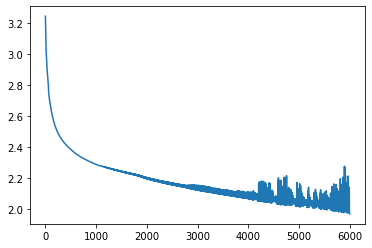

In [48]:
newt = Model().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(newt.parameters(), lr=0.005)

losses = []
for epoch in range(6000):
    optimizer.zero_grad()
    out = newt(train_x)
    
    loss = criterion(out, train_y)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print('Epoch: {}, Loss: {}'.format(epoch, loss.item()))

plt.plot(losses)
plt.show()

In [12]:
# Prepare input features for prediction (replace with your own values)
input_features = [
	100,
	1,
	0,
	150,
	191,
	192,
	130,
	225,
	192,
	1,
	0,
	1,
	0,
	1,
	0,
	0,
	0,
	0,
	0,
	0,
	0,
	0,
	0,
    34
]

# Convert input features to PyTorch tensor
input_tensor = torch.tensor([input_features]).float()

# Set the model to evaluation mode
newt.eval()

# Make the prediction
with torch.no_grad():
    prediction_tensor = newt(input_tensor)

prediction_tensor

tensor([[ 0.8084, -1.8425]])

In [57]:
# Prepare input features for prediction (replace with your own values)
input_features = [
	100,
	1,
	0,
	150,
	191,
	192,
	130,
	225,
	192,
	1,
	0,
	1,
	0,
	1,
	0,
	0,
	0,
	0,
	0,
	0,
	0,
	0,
	0,
    34
]

# Convert input features to PyTorch tensor
input_tensor = torch.tensor([input_features]).float()

# Set the model to evaluation mode
newt.eval()

# Make the prediction
with torch.no_grad():
    prediction_tensor = newt(input_tensor)

# Convert the prediction tensor back to the original datatype
prediction_array = prediction_tensor.numpy()
output_datatypes = [int, int, int, int, int, int, int, int, int, int, int, int, int, int]  # Define the desired output datatypes
# output_datatypes = [bool, bool, bool, bool, bool, bool, bool, bool, bool, bool, bool, bool, bool, bool]  # Define the desired output datatypes
# Convert each output value to the original datatype
predicted_outputs = [output_dtype(prediction_array[0][i]) for i, output_dtype in enumerate(output_datatypes)]

IndexError: index 2 is out of bounds for axis 0 with size 2

In [20]:
input_features = [
	35,
	1,
	0,
	176,
	158,
	192,
	3,
	124,
	192,
	0,
	0,
	0,
	0,
	0,
	0,
	0,
	0,
	0,
	0,
	0,
	0,
	0,
    0,
    -34
]
input_tensor = torch.tensor([input_features]).float()
onePred = newt(input_tensor)
onePred.data[0][0] = -1.8604
onePred.data[0][1] = 0.7848
_, predicted = torch.max(onePred.data, 1)
predicted[0]

tensor(1)

In [90]:
predicted_outputs

[1, 3, 0, 2, 1, 1, -2, -2, 0, 0, -2, -1, -2, 1]

In [77]:
train_x[257]

tensor([133.,   1.,   0., 126., 372., 125.,  71., 448., 192.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  76.])

In [53]:
onePred = newt(input_tensor)
onePred.data

tensor([[ 1.3561, -0.7060]])

In [54]:
_, predicted = torch.max(onePred.data, 1)

In [55]:
predicted

tensor([0])

In [51]:
y_pred = newt(torch.atleast_2d(input_tensor))

In [52]:
y_pred

tensor([[ 1.3561, -0.7060]], grad_fn=<AddmmBackward0>)

In [23]:
# Split the data into train and test
train = gameStateDF.sample(frac=0.8, random_state=200)
test = gameStateDF.drop(train.index)

# Convert the data into tensors
trainNP_X = train[
        [
            "timer",
            "has_round_started",
            "is_round_over",
            "health_1",
            "x_coord_1",
            "y_coord_1",
            "health_2",
            "x_coord_2",
            "y_coord_2",
            "is_jumping_2",
            "is_crouching_2",
            "up_2",
            "down_2",
            "right_2",
            "left_2",
            "select_2",
            "start_2",
            "Y_2",
            "B_2",
            "X_2",
            "A_2",
            "L_2",
            "R_2"  
        ]
    ].to_numpy()
trainVals_X = np.vstack(trainNP_X).astype(float)
train_x = torch.from_numpy(trainVals_X).float()

trainNP_Y = train[
        [
            "is_jumping_1",
            "is_crouching_1",
            "up_1",
            "down_1",
            "right_1",
            "left_1",
            "select_1",
            "start_1",
            "Y_1",
            "B_1",
            "X_1",
            "A_1",
            "L_1",
            "R_1" 
        ]
    ].to_numpy()
trainVals_Y = np.vstack(trainNP_Y).astype(float)
train_y = torch.from_numpy(trainVals_Y).float()

testNP_X = train[
        [
            "timer",
            "has_round_started",
            "is_round_over",
            "health_1",
            "x_coord_1",
            "y_coord_1",
            "health_2",
            "x_coord_2",
            "y_coord_2",
            "is_jumping_2",
            "is_crouching_2",
            "up_2",
            "down_2",
            "right_2",
            "left_2",
            "select_2",
            "start_2",
            "Y_2",
            "B_2",
            "X_2",
            "A_2",
            "L_2",
            "R_2" 
        ]
    ].to_numpy()
testVals_X = np.vstack(testNP_X).astype(float)
test_x = torch.from_numpy(testVals_X).float()

testNP_Y = train[
        [
            "is_jumping_1",
            "is_crouching_1",
            "up_1",
            "down_1",
            "right_1",
            "left_1",
            "select_1",
            "start_1",
            "Y_1",
            "B_1",
            "X_1",
            "A_1",
            "L_1",
            "R_1" 
        ]
    ].to_numpy()
testVals_Y = np.vstack(testNP_Y).astype(float)
test_y = torch.from_numpy(testVals_Y).float()

In [79]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()

        self.layer1 = nn.Linear(23, 30)
        self.a1 = nn.ReLU()
        self.layer2 = nn.Linear(30, 25)
        self.a2 = nn.ReLU()
        self.layer3 = nn.Linear(25, 20)
        self.a3 = nn.Sigmoid()
        self.layer4 = nn.Linear(20, 14)

        
    def forward(self, x):
        x = self.layer1(x)
        x = self.a1(x)
        x = self.layer2(x)
        x = self.a2(x)
        x = self.layer3(x)
        x = self.a3(x)
        x = self.layer4(x)

        return x

In [87]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

torch.Size([932, 23])
torch.Size([932, 23])
torch.Size([932, 14])
torch.Size([932, 14])


Epoch: 0, Loss: 3.154520034790039
Epoch: 100, Loss: 2.7333664894104004
Epoch: 200, Loss: 2.5646002292633057
Epoch: 300, Loss: 2.4913554191589355
Epoch: 400, Loss: 2.448866605758667
Epoch: 500, Loss: 2.4196505546569824
Epoch: 600, Loss: 2.397871255874634
Epoch: 700, Loss: 2.380380630493164
Epoch: 800, Loss: 2.3657171726226807
Epoch: 900, Loss: 2.352698802947998
Epoch: 1000, Loss: 2.3407528400421143
Epoch: 1100, Loss: 2.333265781402588
Epoch: 1200, Loss: 2.32598876953125
Epoch: 1300, Loss: 2.3192737102508545
Epoch: 1400, Loss: 2.307070255279541
Epoch: 1500, Loss: 2.295961380004883
Epoch: 1600, Loss: 2.288743734359741
Epoch: 1700, Loss: 2.2807457447052
Epoch: 1800, Loss: 2.272986888885498
Epoch: 1900, Loss: 2.2648189067840576
Epoch: 2000, Loss: 2.256765127182007
Epoch: 2100, Loss: 2.250904083251953
Epoch: 2200, Loss: 2.2458086013793945
Epoch: 2300, Loss: 2.241250991821289
Epoch: 2400, Loss: 2.2357771396636963
Epoch: 2500, Loss: 2.231072187423706
Epoch: 2600, Loss: 2.223228931427002
Epoch:

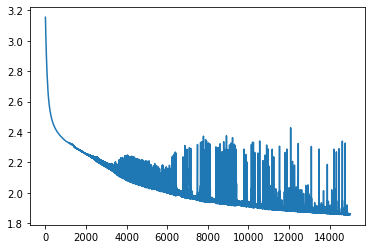

In [111]:
newt = Model().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(newt.parameters(), lr=0.005)

losses = []
for epoch in range(15000):
    optimizer.zero_grad()
    out = newt(train_x)
    
    loss = criterion(out, train_y)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print('Epoch: {}, Loss: {}'.format(epoch, loss.item()))

plt.plot(losses)
plt.show()

In [107]:
train_x[257]

tensor([133.,   1.,   0., 123., 367., 192.,  97., 423., 192.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])

In [108]:
onePred = newt(train_x[257])
onePred

tensor([ 1.3874,  2.9057, -0.3337,  2.2543,  1.1467,  2.0722, -2.6416, -2.8776,
         0.5750, -0.4227, -2.9700, -2.7704, -2.5223,  1.2088],
       grad_fn=<AddBackward0>)

In [39]:
# Predict the test data
test_x = test_x.to(device)
test_y = test_y.to(device)
out = newt(test_x).to(device)
_, predicted = torch.max(out.data, 1)
print('Predicted: ', predicted)
print('Actual: ', test_y.squeeze())
predicted[0]
test_y[0]

Predicted:  tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 4, 4, 4,
        4, 4, 4, 3, 0, 4, 4, 4, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 3, 3, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 3, 3, 3,
        3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 0, 0, 0, 0, 0, 0,
        0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3,
        3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3])
Actual:  tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [95]:
# Predict the test data
test_x = test_x.to(device)
test_y = test_y.to(device)
out = newt(test_x).to(device)
_, predicted = torch.max(out.data, 1)
print('Predicted: ', predicted)
print('Actual: ', test_y.squeeze())
predicted[0]
test_y[0]

Predicted:  tensor([1, 0, 0, 1, 3, 0, 1, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 1,
        0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 3, 0, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 1, 1, 0, 0, 0, 3, 0, 3, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
        1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 3,
        0, 1, 0, 0, 1, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 1, 3, 0, 0, 1, 1, 0, 1,
        1, 0, 1, 0, 1, 1, 0, 3, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 3, 0, 0, 0, 1,
        0, 3, 0, 0, 0, 1, 1, 3, 1, 0, 0, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
        0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 3, 0, 0, 0, 1, 0, 1, 0, 3, 1,
        1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 3, 0, 0, 0, 1, 1, 0, 1, 0, 1, 3,
        1, 0, 1, 1, 0, 0, 1,

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])